In [3]:
import sys
#sys.path
sys.path[0] = '/home/alvaroaguilar/nestsmart/nestsmart'

In [4]:
import utils, Asset
import numpy as np
import xarray as xr
import pandas as pd
import pendulum

In [3]:
from icecream import ic

In [4]:
from UQpy.sampling import MonteCarloSampling
from UQpy.run_model.RunModel import RunModel
from UQpy.run_model.model_execution.PythonModel import PythonModel
from UQpy.distributions import Normal
import time

In [5]:
nsims = 10

first_year = 2024
number_years = 15

In [6]:
d = Normal(loc=0.05, scale=0.174)
x_mcs = MonteCarloSampling(distributions=[d]*number_years, nsamples=nsims, random_state=987979)
#Names = ['var1', 'var11', 'var111']

# UQpy returns samples as an ndarray
#print("Monte Carlo samples of three random variables from a standard normal distribution.")
#print('Samples stored as an array:')
#print('Data type:', type(x_mcs.samples))
#print('Number of samples:', len(x_mcs.samples))
#print('Dimensions of samples:', np.shape(x_mcs.samples))
#print('Samples')


#print(x_mcs.samples)

In [7]:
first_year = 2024
number_years = 15


# Call to RunModel - Here we run the model while instantiating the RunModel object.
m = PythonModel(model_script='utils.py', 
                model_object_name='uqpy_wrapper_balances_eop',
                initial_investment=489000,
                inflows = [0]*number_years,
                outflows = [0]*number_years,
                #years=[2000,2001,2003,2004])
                #years = first_year + np.arange(0,number_years+1))
                periods = [pendulum.datetime(i,1,1) for i in first_year + np.arange(0,number_years+1)])
m11 = RunModel(model=m, ntasks=1 )
m11.run(samples=x_mcs.samples,)
#print("The values returned from the Matlab simulation:")
#print(m11.qoi_list)

In [8]:
len(m11.qoi_list)

10

In [9]:
dat = xr.concat(m11.qoi_list,dim='sim')

In [10]:
dat

<xarray.DataArray (sim: 10, period: 16)>
array([[ 489000.        ,  703341.92823802,  691328.93749901,
         627679.18082395,  734650.90001448,  670097.0416454 ,
         690080.75627173,  667183.07630088,  784520.20661172,
         634355.47120113,  618365.40688538,  639294.6811125 ,
         670196.51840822,  683597.57809817,  725905.49304143,
         774086.48165372],
       [ 489000.        ,  717004.29397012,  864020.20658951,
         927040.5246262 , 1028696.86583027, 1428040.29848272,
        1389451.98016795, 1326524.08373574, 1519381.39358792,
        1925803.95610988, 2332071.56603191, 1996190.53507853,
        1836416.84388862, 1627932.49266762, 1368749.2712798 ,
        1295213.03427906],
       [ 489000.        ,  490401.79900777,  373060.96550292,
         440782.79333292,  402925.67183071,  524882.8771812 ,
         708999.41996694,  809966.13219644,  776731.3579286 ,
         714225.46846214,  707473.50435484,  848892.95394501,
        1069209.74524456, 1329544.57778287, 1518977.21432218,
        1858860.4059931 ],
       [ 489000.        ,  523297.71757336,  644987.4020734 ,
         816225.92670903, 1033881.08266371, 1033677.73251563,
...
         689874.44475541,  643843.21682847,  694274.52280746,
         941406.59758796],
       [ 489000.        ,  569819.76448669,  599965.34473718,
         556876.35412339,  575600.28236648,  470011.14654669,
         491151.64897383,  443182.71917893,  487635.12646822,
         526211.17044578,  487317.11490227,  514021.00652111,
         563629.95938084,  550268.25396793,  659217.64440645,
         708886.04369035],
       [ 489000.        ,  505419.71834608,  484632.30583611,
         433046.32977557,  532599.33183568,  523532.38056025,
         408583.63038527,  477275.21778418,  509933.78043257,
         444153.38299823,  433034.18682347,  478890.74249382,
         554324.07937702,  748659.88993946,  804739.44489003,
         843355.77019729],
       [ 489000.        ,  505517.23762769,  499945.06813606,
         606437.94916001,  709342.6619291 ,  736087.04871873,
         442323.34197516,  350126.21808859,  365124.4996181 ,
         350279.17411455,  467074.35115449,  497293.38940395,
         422931.26700299,  359701.43476119,  379599.91858959,
         311133.65824538]])
Coordinates:
  * period   (period) object 2024-01-01T00:00:00+00:00 ... 2039-01-01T00:00:0...
Dimensions without coordinates: sim

In [11]:
mean = dat.mean('sim')
std = dat.std('sim')
q3 = dat.quantile(0.032,dim='sim')
q97 = dat.quantile(0.968,dim='sim')

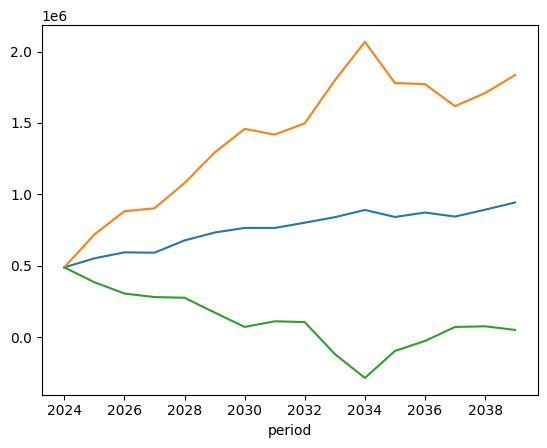

In [12]:
mean.plot()
(mean+2*std).plot()
(mean-2*std).plot()
#q3.plot()
#q97.plot()

In [ ]:
a = Asset.Asset(0,[10,10],[-1,-1],[0.1,0.1],[2000,2001,2002])

In [ ]:
a.balance_eop

In [ ]:
np.array([0.1,0.1])

In [ ]:
utils.uqpy_wrapper_balances_eop(input=np.array([[0.1,0.1,0.1]]))

In [ ]:
import pendulum

In [ ]:
[pendulum.datetime(i,1,1) for i in range(2023,2027)]

In [8]:
Asset.Asset()

TypeError: Asset.__init__() missing 5 required positional arguments: 'initial_investment', 'cash_in', 'cash_out', 'returns', and 'periods'

In [9]:
TypeError

TypeError